In [1]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sp
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [37]:
#function that reads the data, turning it into a pandas dataframe
def read_csv(filename):
    dat = pd.read_csv(filename, sep = ',', header = 13, names = ["Time (s)", "voltage (V)"]) 
    return dat

def polynomial(x, a, b, c): #polynomisk function til fit
    return a + x * b + x**2 * c

#function for calculating acceleration on a dataset. returns  [WIP]
def acceleration_calc(filename, theta, D_ball, D_rail, D_sensor, eD_sensor): #string, float, float, float, list of floats, list of floats

    dat = read_csv(filename)
    peaks = sp.find_peaks(dat["voltage (V)"], height = 4, distance = 100)
    time = []
    for i in peaks[0]: #find tiderne hvor vi passerer, laver liste fra første gate til sidste.
        time.append(dat["Time (s)"][i])
    time = np.array(time)
    least_squares = LeastSquares(time, D_sensor, eD_sensor, polynomial) #for the minuit least squares fitting function. use chisquare instead?
    m = Minuit(least_squares, a=0, b=0, c=0)
    m.migrad()
    m.hesse()
    #plot the data with fit, maybe remove when we are confident everything works
    plt.errorbar(time, D_sensor, eD_sensor, fmt="o", label="data") #plot data
    plt.plot(time, polynomial(time, *m.values), label="fit") #plot fitted line
    # display legend with some fit info
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(time) - m.nfit}",
    ]
    for p, v, e in zip(m.parameters, m.values, m.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    plt.legend(title="\n".join(fit_info));
    return m.values[2]

#function for calculating positions of sensors
#def sensor_position(): #input a pd dataframe? make this when  you get data
    

#function for looping over all files in a directory

92.53106975251073


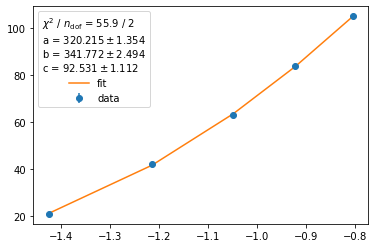

In [45]:

filename = "Anders_L_fp.csv" #filename of the file to load
path = "../Data/Incline/"    #path to the data
D_sensor = [21.0, 42.0, 63.0, 84.0, 105.0] #sensor placement . These are example, should use proper data
eD_sensor = [0.1, 0.1, 0.1, 0.1, 0.1] #sensor placement error. These are example, should use proper data

stuff = acceleration_calc(path + filename, 0, 0, 0, D_sensor, eD_sensor)
print(stuff[2])

In [ ]:
dat = read_csv(path + filename)
plt.plot(dat["Time (s)" ], dat["voltage (V)"])